# Deciphering Emotions: A Deep Dive into Sentiment Analysis of Rotten Tomatoes Movie Reviews

## Read Me


This is a Python script that uses TensorFlow for sentiment analysis of movie reviews in the Rotten Tomatoes dataset. The script works in a Google Colab environment and uses Google Drive for data storage. The following sections provide a brief overview of each major part of the script:

Import Libraries:
The script starts by importing several essential Python libraries, including numpy for numerical computations, pandas for data manipulation, TensorFlow for building and training the deep learning model, Tokenizer and pad_sequences from Keras for preprocessing the text data, and train_test_split from sklearn for splitting the data into training and validation sets.

Mount Google Drive:
In the Google Colab environment, it mounts Google Drive to access the data stored there.

Load Data:
It then loads the training and testing data from TSV files stored in Google Drive. It extracts phrases (the text of the movie reviews) and labels (the sentiment scores) from the training data.

Set Hyperparameters:
Several hyperparameters for the model and the data preprocessing steps are then defined.

Model and Prediction:
It tokenizes the phrases and converts them to sequences. These sequences are then padded to ensure they all have the same length. It splits the data into training and validation sets.

A Sequential model is then defined using TensorFlow's Keras API. The model consists of an Embedding layer, a GlobalAveragePooling1D layer, a Dense layer with 'relu' activation, and a final Dense layer with 'softmax' activation.

The model is compiled with 'sparse_categorical_crossentropy' loss, 'adam' optimizer, and accuracy as the metric. It is then trained on the training data for a specified number of epochs.

After training, it prepares the test data in the same way as the training data. It then uses the trained model to predict sentiment labels for the test data. These predicted labels are saved to a CSV file in Google Drive.

Visualize Accuracy and Loss:
Finally, the script plots graphs of accuracy and loss over the training epochs for both the training and validation sets. These plots can help to visually assess how well the model is learning and whether overfitting is occurring.

This Python script is a comprehensive example of a sentiment analysis project using a deep learning model. It covers all the main steps involved, from data loading and preprocessing, through to model training, prediction, and evaluation.

## Import several essential libraries for data manipulation, preprocessing, and model building

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

## Mount Google Drive in a Google Colab environment



In [5]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load training and testing data from TSV (tab-separated values) files

In [6]:
path = '/content/drive/MyDrive/Projects/Sentiment Analysis of Movie Reviews - Accurately Classifying Sentiments in the Rotten Tomatoes Dataset'
# Load data
train_data = pd.read_csv(f'{path}/train.tsv', delimiter='\t')
test_data = pd.read_csv(f'{path}/test.tsv', delimiter='\t')

# Extract phrases and labels
phrases = train_data['Phrase'].values
labels = train_data['Sentiment'].values

## Set hyperparameters

In [7]:
# Set hyperparameters
vocab_size = 10000
max_length = 100
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<oov>'

## Model and Prediction

In [11]:
# Tokenize phrases
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(phrases)

# Convert phrases to sequences and pad them
sequences = tokenizer.texts_to_sequences(phrases)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=2)

# Prepare test data
test_phrases = test_data['Phrase'].values
test_sequences = tokenizer.texts_to_sequences(test_phrases)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Predict sentiment labels for test data
predictions = model.predict(test_padded_sequences)

# Convert predictions to sentiment labels
predicted_labels = np.argmax(predictions, axis=1)

# Save predictions to a CSV file
output = pd.DataFrame({'PhraseId': test_data['PhraseId'], 'Sentiment': predicted_labels})
output.to_csv('submission.csv', index=False)
output.to_csv(f'{path}/submission.csv', index=False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                1088      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 161,413
Trainable params: 161,413
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3902/3902 - 23s - loss: 1.2106 - accuracy: 0.5201 - val_loss: 1.1641 - val_accuracy: 0.5235 - 23s/epoch

## Visualize the acuuracy and loss

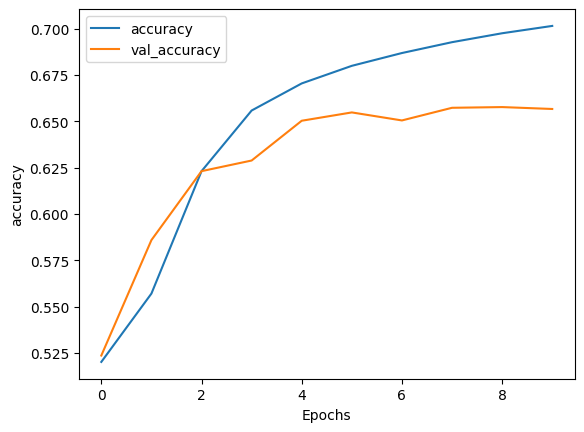

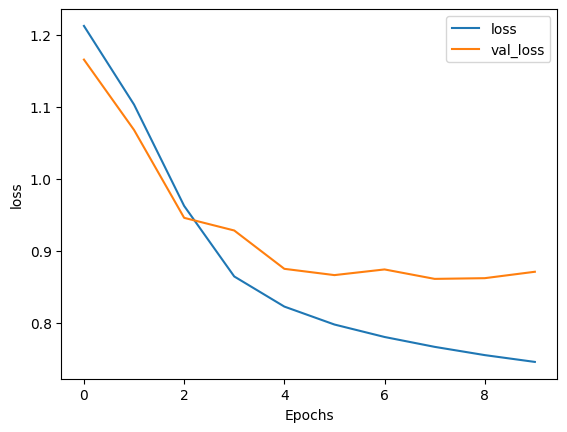

In [10]:
# Plot graphs
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.legend([metric, 'val_' + metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.show()

plot_metric(history, "accuracy")
plot_metric(history, "loss")